# Lyanna und die Orks 🧝‍♂️
Basierend auf "Functional vs Object-Oriented Programming - A showcase" (https://github.com/joelbarmettlerUZH/Functional_vs_OOP_Showcase), angepasst und übersetzt von Torben Ferber, Illustrationen von Lea Reuter

### Story
Vor langer Zeit lebte im mystischen Land Etepenia eine tapferer Heldin namens **Lyanna**. **Lyanna** war im ganzen Reich für ihren unerschütterlichen Mut und ihren unbeugsamen Charakter bekannt. Sie hatte ein Herz aus Gold und den brennenden Wunsch, die Einwohner\*innen vor dem Bösen zu schützen.
Auf der anderen Seite von Etepenia, im Tückischen Wald der Verzweiflung, herrschte ein furchterregender Ork namens **Omugug**. **Omugug** war der König der Orks, ein Kämpfer von ungeheurer Stärke. Er war berüchtigt für seine rücksichtslose Art und seinen unstillbaren Hunger nach Macht - und Pfannkuchen, aber das wissen die Wenigsten.
Eines schicksalhaften Tages erhielt **Lyanna** die Nachricht, dass Omugug das berühmte **Tuch von Eldoria** gestohlen hatte, ein Relikt, das unvorstellbare Macht besitzen sollte (das war völliger Quatsch, aber auch das wussten die Wenigsten). Entschlossen, das Tuch zurückzuholen und den Frieden im Land wiederherzustellen, begab sich **Lyanna** auf eine gefährliche Reise, um ihren Erzfeind zu stellen.
Auf dem Weg traf **Lyanna** auf Wiederstand: Orks. Viele Orks. Große und Kleine. Mit Keulen und Äxten. Mit Rüstungen oder ohne. Erst nach vielen Tagen und Kämpfen traf Lyanna auf **Omugug**. Der Kampf würde die Grundfesten von Eldoria erschütterte. **Omugugs** rohe Kraft traf auf **Lyannas** unvergleichliches Geschick mit der Klinge. Funken flogen, als sich ihre Waffen kreuzten. Und in jedem Schlag schwang das Schicksal von Etepenia mit.

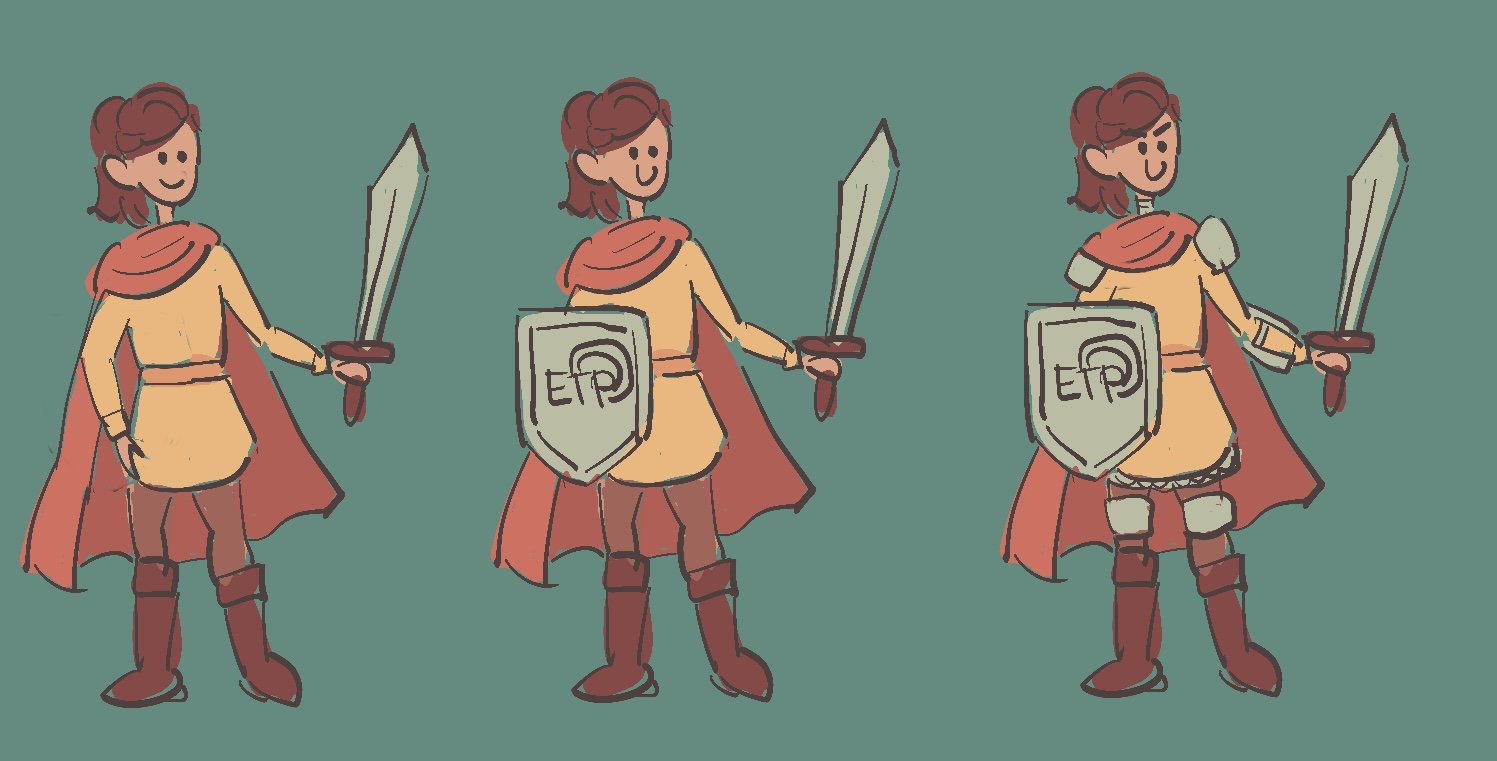

# Problemstellung

Wir werden ein textbasiertes Computerspiel entwickeln und dabei funktionale und objektorientierte Programmierung nutzen. Wir werden zunächst nur Funktionen und Datenstrukturen verwenden, wie sie in älteren, nicht objektorientierten Programmiersprachen wie C wahrscheinlich implementiert würden. Dann werden wir die gleichen Funktionen implementieren, aber mit einem objektorientierten Ansatz. Sie werden ein gutes Verständnis dafür entwickeln, wie Objektorientierung mehr Flexibilität und eine klarere Architektur bietet.

Lassen Sie uns zunächst den Umfang unseres Spiels festlegen. Wir wollen es einfach halten: Wir wollen ein Spiel entwickeln, in dem wir Lyanna spielen. Wir, Lyanna, können mit einem Orc kämpfen und ihn mit unserer Waffe töten. Orcs ihrerseits können uns leider mit ihrer Waffe auch töten. Wenn Lyanna den Kampf gewinnt, kann er den Ork ausplündern (engl. loot), d.h. die Waffe mitnehmen und im nächsten Kampf verwenden. Um mit dem Spiel fortzufahren, kann Lyanna sich mit einem Heiltrank heilen. Die Gegner werden immer schwieriger indem sie mit besseren Waffen, mehr Trefferpunkten, oder gar schweren Rüstungen anreten.

So weit, so gut. Lassen Sie uns die Informationen, die wir erhalten haben, abstrahieren (d.h. in eine Form bringen, die wir in Python ausdrücken können). Wir unterscheiden zwischen zwei Kategorien: Attribute und Methoden. Oder, allgemein gesprochen: Werte, die den Zustand unseres Charakters und der Orcs beschreiben, und Aktionen, die sie ausführen können.

Wie in der Softwareentwicklung üblich werden wir englische Begriffe für Variablen und die Dokumentation verwenden.

# Attribute
Die Attribute unseres Characters sind ihr Name, die Anzahl der Lebenspunkte (engl. hitpoints oder HP), ihre aktuelle Waffe (engl. weapon) und wie viele Heiltränke (engl. healing potion) sie noch hat. Unser Gegner hat auch einen Namen (ja, auch Orcs haben eine Familie!), seine Lebenspunkte und er hat auch eine Waffe. Um das ganze etwas spannender zu machen, haben die Waffen einen Namen, einen Schaden, und einen Typ. Als Textbeschreibung würde unser Character also wie folgt klingen:

**Spieler\*in: Lyanna (Aktuelle Trefferpunkte sind 100, ihre Waffe vom Typ "Dolch" heißt "Blutschnitzer", der Schaden ist 12, sie hat 3 Heiltränke die jeweils 50 HP heilen.)**

Der erst, noch sehr schwache, Ork auf den Lyanna trifft klingt wie folgt:

**Gegner: Brumbatz (Aktuelle Trefferpunkte sind 20, seine Waffe vom Typ "Keule" heißt "Hoffnungsbrecher", der Schaden ist 15.5.)**

# Methoden
Nun sind die Methoden, wie beschrieben, die Dinge, die ein Charakter oder Gegner tun kann. Unser Hauptcharakter Lyanna hat zunächst die Fähigkeit, jemanden anzugreifen (engl. *attack*), sich zu heilen (engl. *heal*) oder einen toten Feind zu plündern (engl. *loot*), während der einfache Ork nur jemanden angreifen kann (das Leben kann so einfach sein). Einfache Orks können nicht plündern und sich auch nicht heilen (ein ziemlich langweiliges und tödliches Leben). Die beiden Gegener\*innen sollen sich abwechseln angreifen.

Ein typischer Kampf soll so aussehen:

* Runde 1: Lyanna attacks Brumbatz → Brumbatz HP decreases by 12 HP

* Runde 2: Brumbatz attacks Lyanna → Lyanna HP decreases by 15.5 HP

* Runde 3: Lyanna attacks Brumbatz → Brumbatz HP decreases by 12 HP. Brumbatz is dead.

* Runde 4: Lyanna loots Brumbatz → Lyanna gets Brumbatzs weapon "Hoffnungsbrecher" of type "Mace"

* Runde 5: Lyanna heals → Lyanna health is increased by (up to) 50 to her maximum of 100, amount of healing potions decreases by 1

# Implementierung ohne Objektorientierung

Beginnen wir mit der Implementierung und abstrahieren wir die Textbausteine in Python-Code. Zuerst brauchen wir eine Möglichkeit, die Characteratribute zu speichern. Python bietet dafür die sehr vielseiting Datenstruktur eines Wörterbuchs (engl. *dictionary*), die es uns erlaubt, Paare aus einen Namen und einen Wert zu geben (engl. *key/value-pair*). Das scheint der perfekte Weg zu sein, um unsere Characterattribute zu repräsentieren. Wir erstellen zwei Wörterbücher, eines für jeden Character, und füllen die Startwerte entsprechend vor.

In [137]:
# define two dictionaries that hold all character and enemy attributes
character_lyanna = {"Name":"Lyanna", "HP": 100, "Weapon": ("Dagger", 12, "Piekser"), "Potions": [3, 50]}
enemy_brumbatz = {"Name":"Brumbatz", "HP": 20, "Weapon": ("Mace", 15.5, "Hoffnungsbrecher")}

Das key/value-pair für die *weapon* ist etwas anders als die anderen: Als Wert übergeben wir ein Tuple - sie erinnern sich sicherlich noch was der Unterschied zu einer Liste ist.
Auch das key/value-pair für die *potions* ist etwas anders als die anderen: Als Wert übergeben wir ein Liste... 

Als nächstes definieren wir die Funktionen, die wir in für unser Spiel benötigen. Neben den bereits beschriebenen Funktionen attack, heal und loot, führen wir eine weitere Funktion print_character ein, die den aktuellen Zustand des Charakters auf der Konsole ausgibt. Wir schreiben zunächst eine leere Funktionsstruktur (engl. *skeleton*), um ein Gefühl für die Funktion zu bekommen - dies ist eine oft verwendetete Technik beim Programmieren!

In [138]:
def print_characters(character):
    """
    Prints information about the specified character.

    Parameters:
        character (Character): The character to be printed.

    Returns:
        None
    """
    pass


def attack(attacker, attacked):
    """
    Initiates an attack from the attacker character to the attacked character.

    Parameters:
        attacker (Character): The character initiating the attack.
        attacked (Character): The character being attacked.

    Returns:
        None
    """
    pass


def heal(character):
    """
    Restores the health of the specified character.

    Parameters:
        character (Character): The character to be healed.

    Returns:
        None
    """
    pass


def loot(character, body):
    """
    Allows the specified character to loot items from a defeated enemy's body.

    Parameters:
        character (Character): The character looting the items.
        body (Enemy): The defeated enemy's body to be looted.

    Returns:
        None
    """
    pass

Nun beginnen wir mit der Implementierung der eigentlichen Funktionen basierend auf unseren *skeletons*. Wir beginnen mit der einfachsten: Die ```print_character```-Funktionen. Wenn wir darüber nachdenken, wie die ```print```-Anweisung aussehen soll, stellen wir schnell fest, dass die Darstellung von Lyanna anders aussehen soll als die Darstellung der Orcs: Das liegt daran, dass Lyanna ein Hauptcharakter ist und daher einen Heiltränke hat, die bei der Darstellung von Lyanna berücksichtigt werden müssen. Wir passen die Characterattribute entsprechend an und fügen dem existierenden Dictionary ein neues *key/value*-Paar hinzu:

In [139]:
# augment the dictionaries with another *key/value-pair*
character_lyanna["Maincharacter"] = True
enemy_brumbatz["Maincharacter"] = False

In unserer  ```print_character``` Funktion nutzen wir den *key* ```Maincharacter``` um in der Ausgabe zwischen Lyanna und einem Orc zu unterscheiden. In weiser Voraussicht unterscheiden wir ausserdem den Fall, dass der Gegner keine Waffe hat (weil wir sie dem Ork weggenommen haben!).

In [140]:
def print_character(character):
    """
    Prints information about the specified character.

    Parameters:
        character (Character): The character to be printed.

    Returns:
        None
    """

    if character["Maincharacter"]:
        print("Name: {}. HP: {}. Weapon: {} ({} damage). Potions: {} (Level: {})".format(character["Name"], character["HP"], character["Weapon"][0], character["Weapon"][1], character["Potions"][0], character["Potions"][1]))
    else:
        if character["Weapon"] is not None:
            print("Name: {}. HP: {}. Weapon: {} ({} damage).".format(character["Name"], character["HP"], character["Weapon"][0], character["Weapon"][1]))
        else:
            print("Name: {}. HP: {}.".format(character["Name"], character["HP"]))


Alle Änderungen oder Erweiterungen testen wir immer direkt:

In [141]:
print_character(character_lyanna)
print_character(enemy_brumbatz)

Name: Lyanna. HP: 100. Weapon: Dagger (12 damage). Potions: 3 (Level: 50)
Name: Brumbatz. HP: 20. Weapon: Mace (15.5 damage).


Das sieht sehr gut aus - wenn Ihnen hier etwas noch nicht gefällt, passen sie die ```print_character```-Funktion oder die Dictionaries entsprechend an.

### attack
Die Angriffsmethode *attack* ist einfach: wir reduzieren einfach die Angriffspunkte des/der Angegriffenen um die Waffenstärke, die der/die Angreifer\*in hat. Nachdem wir die Angriffspunkte reduziert haben, überprüfen wir, ob der/die angegriffene Charakter\*in tot ist (die Waffenstärke ist auf 0 oder weniger gesunken) und geben die entsprechende Meldung aus. Wir haben die Wahl dies als *pure function* zu implementieren (siehe VL 5) oder als normale Funktion. Die folgende Implementierung ist keine *pure function* - versuchen sie aber doch als Übung einmal die *attack* Funktionalität als *pure function* zu implementieren.

In [142]:
# this is not a pure function: it directly modfies the argument ```attacked``` 
# and it prints out information on the screen

def attack(attacker, attacked):
    print("{} attacked {} with {}!".format(attacker["Name"],attacked["Name"],attacker["Weapon"][2]))
    attacked["HP"] -= attacker["Weapon"][1]
    if attacked["HP"] <= 0:
        print("{} is dead!".format(attacked["Name"]))

In [143]:
# test the implementation
attack(enemy_brumbatz, character_lyanna)
print_character(character_lyanna)
attack(character_lyanna, enemy_brumbatz)
print_character(enemy_brumbatz)

Brumbatz attacked Lyanna with Hoffnungsbrecher!
Name: Lyanna. HP: 84.5. Weapon: Dagger (12 damage). Potions: 3 (Level: 50)
Lyanna attacked Brumbatz with Piekser!
Name: Brumbatz. HP: 8. Weapon: Mace (15.5 damage).


### loot
Jemanden zu plündern ist eine Prozedur, die nur mit einem/einer Hauptcharakter\*in aufgerufen werden sollte, da Orks überhaupt nicht plündern können. Wir brauchen also zuerst eine ```if```-Anweisung, um zu prüfen, ob der als Argument angegebene Charakter wirklich ein/e Hauptcharakter/*in ist. Dann prüfen wir, ob der/die Charakter\*in, den wir plündern wollen, tatsächlich tot ist, denn ein lebender Ork wird uns höchstwahrscheinlich nicht plündern lassen. Denken sie daran, dass sie dem geplünderten Character die Waffe auch wegnehmen müssen (auch wenn er tot ist).

In [144]:
# this is not a pure function: it directly modfies the argument ```character```
# and it prints out information on the screen

def loot(character, body):
    if character["Maincharacter"] and body["HP"] <= 0:
        if body["Weapon"] is not None:
            character["Weapon"] = body["Weapon"]
            print("{} looted {}. New weapon found: {} {} with strengh {}".format(character["Name"], body["Name"], body["Weapon"][0], body["Weapon"][2], body["Weapon"][1]))
            body["Weapon"] = None #take away the weapon from the body
        else:
            print("{} has no weapon to loot!".format(body["Name"]))
    else:
        print("Looting not possible - {} is not dead yet!".format(body["Name"]))


Denken sie daran: Nur tote Orks sind gute Orks. Und nur tote Orks können sie *looten*. Wir greifen sicherheitshalb nochmal an...

In [145]:
# test the implementation
attack(character_lyanna, enemy_brumbatz)
loot(character_lyanna, enemy_brumbatz)
print_character(character_lyanna)
print_character(enemy_brumbatz)

Lyanna attacked Brumbatz with Piekser!
Brumbatz is dead!
Lyanna looted Brumbatz. New weapon found: Mace Hoffnungsbrecher with strengh 15.5
Name: Lyanna. HP: 84.5. Weapon: Mace (15.5 damage). Potions: 3 (Level: 50)
Name: Brumbatz. HP: -4.


<div class="alert alert-block alert-info">  
Wir wollen hier künftig sicher noch etwas nachbessern: Will Lyanna wirklich immer die neue Waffe des Orks benutzen oder wollen wir dem/der Spieler*\in vielleicht eine aktive Wahl lassen? Sollten wir nicht besser testen ob Lyanna auch lebt bevor wir einen Ork looten?</div>

### heal
Wie auch schon ```loot``` ist ```heal```eine Aktion, die nur mit einem/einer Hauptcharakter\*in aufgerufen werden kann, da Orks keine Potions besitzen. Wir brauchen also wieder zuerst eine ```if```-Anweisung, um zu prüfen, ob der als Argument angegebene Charakter wirklich ein/e Hauptcharakter/*in ist. Dann prüfen wir, ob der/die Charakter\*in die wir heilen wollen noch Potions verfügbar hat. Dann erhöhen wir die HP um 50. Diesen Wert sollten wir aber im Dictionary festlegen und nicht als sog. *magic number* im Code verstecken - wir passen Lyanna also nochmal an, der Ork kann bleiben wie er/sie ist.


In [146]:
def heal(character):
    if character["Maincharacter"]:
        if character["Potions"][0] > 0:
            character["Potions"][0] -= 1
            character["HP"] += character["Potions"][1]
            print("{}'s health is increased to {}!".format(character["Name"], character["HP"]))
        else:
            print("No potions left! :(")
    else:
        print("Can not heal this character.... is it an Ork?")
    return character

In [147]:
# test the implementation
heal(character_lyanna)
print_character(character_lyanna)

Lyanna's health is increased to 134.5!
Name: Lyanna. HP: 134.5. Weapon: Mace (15.5 damage). Potions: 2 (Level: 50)


<div class="alert alert-block alert-info">  
Auch hier gibt es noch Arbeit für die Zukunft: Wollen wir es erlauben, dass Lyanna sich beliebig heilt oder soll es maximale HP geben?

### Der erste Kampf!
Wir haben Lyanna und unseren ersten Ork implementiert, wir haben Funktionen für *attack*, *heal*, und *loot* geschrieben - es wird Zeit das alles zu testen. Bevor wir loslegen, setzen wir die HP und Waffen unserer beiden Charactere wieder auf die ursprünglichen Werte. Der Kampf geht auf Leben und Tod, let's go!

In [148]:
character_lyanna = {"Name":"Lyanna", "HP": 100, "Weapon": ("Dagger", 12, "Piekser"), "Potions": [3, 50], "Maincharacter":True}
enemy_brumbatz = {"Name":"Brumbatz", "HP": 20, "Weapon": ("Mace", 15.5, "Hoffnungsbrecher"), "Maincharacter":False}

In [149]:
print_character(character_lyanna)
print_character(enemy_brumbatz)
attack(character_lyanna, enemy_brumbatz)
attack(enemy_brumbatz, character_lyanna)
attack(character_lyanna, enemy_brumbatz)
print_character(character_lyanna)
loot(character_lyanna, enemy_brumbatz)
heal(character_lyanna)
print_character(character_lyanna)
print_character(enemy_brumbatz)

Name: Lyanna. HP: 100. Weapon: Dagger (12 damage). Potions: 3 (Level: 50)
Name: Brumbatz. HP: 20. Weapon: Mace (15.5 damage).
Lyanna attacked Brumbatz with Piekser!
Brumbatz attacked Lyanna with Hoffnungsbrecher!
Lyanna attacked Brumbatz with Piekser!
Brumbatz is dead!
Name: Lyanna. HP: 84.5. Weapon: Dagger (12 damage). Potions: 3 (Level: 50)
Lyanna looted Brumbatz. New weapon found: Mace Hoffnungsbrecher with strengh 15.5
Lyanna's health is increased to 134.5!
Name: Lyanna. HP: 134.5. Weapon: Mace (15.5 damage). Potions: 2 (Level: 50)
Name: Brumbatz. HP: -4.


Das war der Erste Kampf - doch der nächste wartet schon! Wir fügen also einen neuen Charakter zu unserem Spiel hinzu: **Olmur**. Sie ist eine besondere Art von Ork, die auch eine Rüstung trägt, die sie vor Schaden schützt, solange die Waffenstärke des Angreifers geringer ist als ihre Rüstungspunkte. 

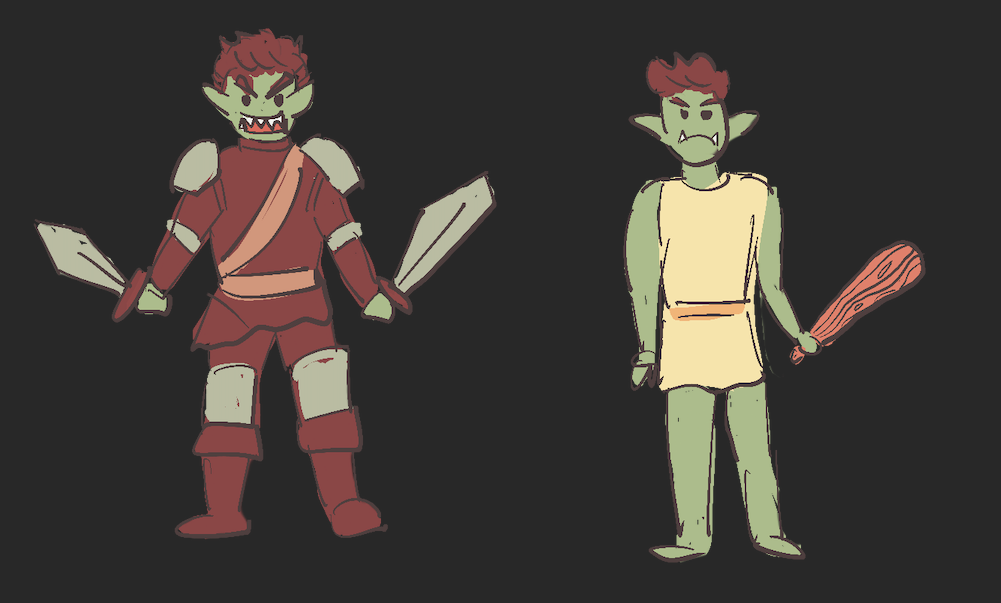

Puh.

Lassen Sie uns kurz über die Änderungen nachdenken, die wir vornehmen müssten, um unser Programm an die neuen Anforderungen anzupassen. Zunächst müssten wir eine weitere *if*-Anweisung zu den Prozeduren ```print_character``` hinzufügen - nervig aber machbar. Dann müsste aber auch die ```attack``` Funktion geändert werden, jetzt auch unter Berücksichtigung der Tatsache, dass es einige Charaktere gibt, die Rüstungen tragen. Aber wir sind noch nicht fertig. Wir müssen eigentlich unsere gesamten Charakter-*dictionaries* ändern, denn wir haben jetzt einen dritten Charaktertyp. Da wir nun drei Charaktertypen eingeführt haben, können wir den key ```Maincharacter``` nicht mehr mit einer boolschen ```True```/```False``` Variable verwenden. Also müssen wir das in eine ganze Zahl ändern: 0 = ```Maincharacter```, 1 = ```Orc```, 2 = ```Ork-with-armor```. Aber dann müssen wir auch alle unsere vorher geschriebenen ```if```-Anweisungen neu schreiben. Es ist klar, dass wir eine Menge Code hinzufügen und umschreiben müssten, nur um eine kleine Änderung in den Spielanforderungen einzuführen.

Stellen wir uns nun ein größeres Spiel vor, bei dem es noch mehr Abhängigkeiten zwischen den verschiedenen Charakteren und Funktionen gibt. Wir würden unsere Funktionen schnell mit sehr vielen```if```-s neuen *dictionary*-Repräsentationen unserer Charaktere überfüllen und unüberschtlich machen.

# Implementierung mit Objektorientierung

Auch wenn funktionales Programmieren einen wichtigen Platz in der Programmierung besitzt, ist dieses Computerspiel ein perfektes Beispiel, bei dem Objektorientierung viel besser ist. Wenn wir eine Software auf objektorientierte Weise entwerfen, verwenden wir Klassen. Jede Klasse, die wir entwerfen, repräsentiert ein Objekt im Spiel. Jede Klasse besteht dann aus Attributen und Methoden, die das Objekt beschreiben, das sie repräsentiert. 

In unserem Spielbeispiel ist es recht einfach, unsere ersten Objekte zu identifizieren: Lyanna (Hauptcharakter), Brumbatz, und Olmur. Diese beiden Objekte ergeben jeweils eine Klasse. Lyanna wird wieder Attribute für ```name```, ```hitpoints```, ```weapon``` sowie die Anzahl und Stärke der ```potions```, die sie noch hat, haben. Ihre Methoden sind weiterhin ```attack```, ```heal``` und ```loot```. Orkan hat immer noch die Attribute ```name```, ```hitpoints```, ```weapon``` und nur eine Methode ```attack```, während Olmur zusätzlich eine Rüstung trägt.  

Aber warum sollte die Strukturierung der Attribute und Methoden in Klassen unsere Probleme lösen? Der Trick besteht darin, eine abstrakte Klasse zu verwenden, die die Attribute und Methoden bündelt, die sowohl Lyanna als auch die Orks gemeinsam haben. Wenn man Lyanna und und die Orks vergleicht, sieht man deutlich, dass sie die meisten Eigenschaften gemeinsam haben - aber eben nicht alle. Wir werden nun ein neues Objekt in unser Spiel einführen, ein so genanntes abstraktes Objekt oder eine abstrakte Klasse. Eine abstrakte Klasse ist eine Klasse, die nicht direkt verwendet/instanziiert werden darf, sondern die nur als Vorlage für andere Klassen dient.

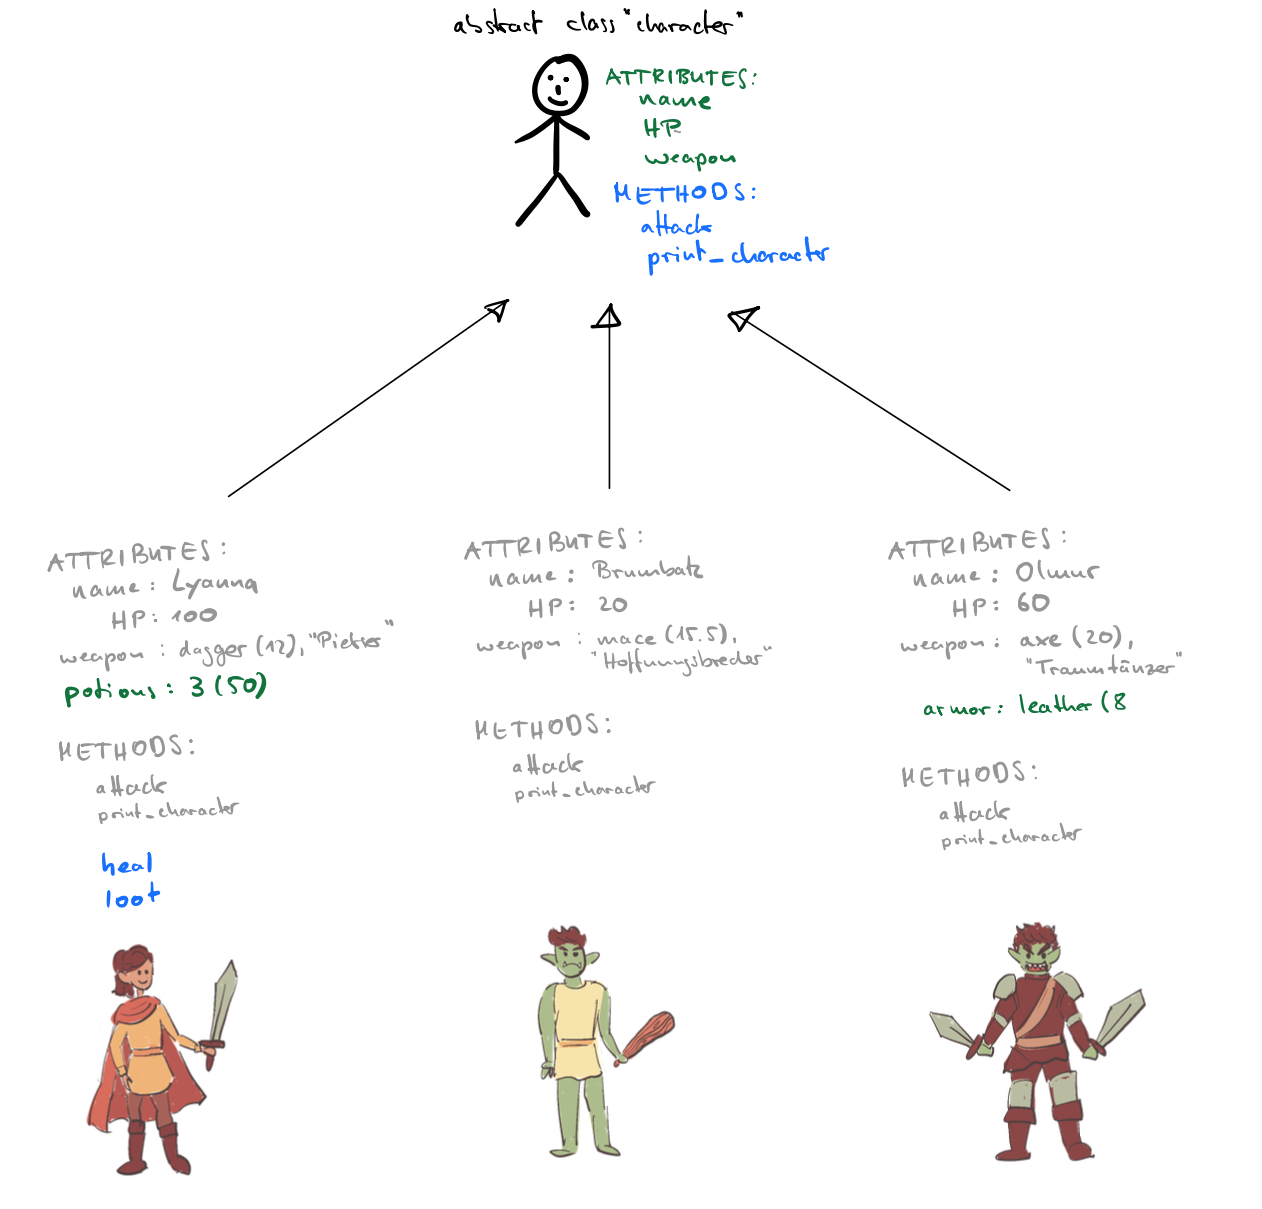

### base class "character"

Beginnen wir mit der Erstellung unserer abstrakten Klasse. Unsere Klasse soll Felder (Instanzvariablen) für ```name```, ```hitpoints```, ```weapon``` sowie die Methode ```attack``` haben. Dieses Mal führen wir auch eine neue Methode namens ```reduce_health``` ein, die wir vorher nicht implementiert haben. Und warum? Weil HP ein privates Attribut sein soll, niemand soll die HP eines Charakters direkt verändern können, außer dem Charakter selbst. Als Faustregel gilt, dass auf private Variablen niemals direkt zugegriffen werden darf, sondern nur über Methoden. Anders als z.B. C++ kennt Python das Konzept von privaten Variablen allerdings nicht explizt sondern verlässt sich darauf, dass Nutzer\*innen verantwortungsvoll mit dem Code umgehen. Wir kennzeichnen solche Variablen mit einem Unterstrich - dies ist nur ein Hinweis, aber kein expliziter Schutz dagegen, dass die Variablen nicht verändert werden sollen.

Erinnern sie sich ausserdem an die Best practice: Wann immer sie eine neue Klasse definieren, implementieren sie immer zuerst die ```__init__``` und die ```__str__``` Methoden!

Wenn wir eine neue Instanz des Charakters erstellen, wollen wir einen bestimmten Namen und eine bestimmte Waffe festlegen. Die HP wollen wir nicht manuell setzen, da die Klasse selbst bestimmt, wie viel HP ein Charakter bekommen soll. Zum Beispiel wird unser Hauptcharakter immer 100 HP haben, und unsere Orks abhängig davon welchen Ork wir gerade als Gegener haben. Wir übergeben das HP-Argument also nicht manuell, sondern berechnen/setzen es später im Konstruktor (der ```___init___``` Methode).

In [150]:
class Character:
    """
    A class to represent a character in a game.

    Attributes
    ----------
    name : str
        name of the character
    HP : int
        hit points of the character
    weapon : str
        weapon of the character

    Methods
    -------
    __init__(self, Name, Weapon):
        Initializes the Character with a name, health points, and a weapon.
        
    __str__(self):
        Returns a string representation of the Character.
        
    attack(self, enemy):
        Makes the Character attack an enemy.
        
    reduceHealth(self, enemy):
        Reduces the health of the Character when attacked by an enemy.
    """

    def __init__(self, name, weapon):
        """
        Initializes the Character with a name, hit points, and a weapon.

        Parameters
        ----------
        name : str
        name of the character
        weapon : tuple
        weapon of the character
        """
        
        if type(self) == Character:
            raise Exception(str(type(self)) + " can not be directly instanced. Please use subclasses.")

        self._name = name
        self._HP = -1 #not set in base class constructor, but in inherited classes later
        self._weapon_type = weapon[0]
        self._weapon_strength = weapon[1]
        self._weapon_name = weapon[2]

    def __str__(self):
        """
        Returns a string representation of the Character.

        Returns
        -------
        str
        a string representation of the Character
        """
        return("Name: {}. HP: {}. Weapon: {} ({} damage).".format(self._name, self._HP, self._weapon_type, self._weapon_strength))

    def get_hp(self): #for experts: this is not the pythonic way for such simple attributes, use properties instead
        """
        Returns current HP of the Character.

        Returns
        -------
        float
        HP of the character
        """

        return self._HP
    
    def attack(self, enemy):
        """
        Makes the Character attack an enemy.

        Parameters
        ----------
        enemy : Character
        the enemy to be attacked by the Character
        """
        enemy.reduce_health(self)


    def reduce_health(self, enemy):
        """
        Reduces the health of the Character when attacked by an enemy.

        Parameters
        ----------
        enemy : Character
        the enemy who attacks the Character
        """
        if self._HP > 0 and enemy._weapon_type is not None:
            damage = enemy._weapon_strength
            self._HP -= damage
            print("{} attacked {} with {} ({} damage)!".format(enemy._name, self._name, enemy._weapon_name, damage))
        if self._HP <= 0:
            print("{} is dead!".format(self._name))



- Was macht die ```if```-Anweisung im ```___init___```?
    - Unsere Klasse soll abstrakt sein, also ist keine Instanziierung erlaubt. Wir wollen nicht, dass irgendein Objekt direkt vom Typ "Charakter" ist. Was würde das überhaupt bedeuten? Man ist entweder ein Ork oder ein Hobbit, aber wie könnte man einfach ein allgemeiner Charakter sein? Der erste Mechanismus, um die Instanzierung der Klasse selbst zu verbieten, besteht also darin, im Konstruktor eine Ausnahme zu erzeugen, wenn jemand versucht, eine Instanz vom Typ "Charakter" zu erzeugen. Dies wird nicht zu Problemen führen, wenn wir später von Character erben, da die geerbten Objekte neue Namen haben werden. Sollte jemand versuchen eine Instanz der "Character"-Klasse zu erzeugen, funktioniert das nun nichtmehr so einfach und führt zu einer Fehlermeldung:

In [151]:
character_lyanna = Character('Lyanna', ('dagger', 12, 'Piekser'))

Exception: <class '__main__.Character'> can not be directly instanced. Please use subclasses.

- Warum setzen wir die HP auf -1, ist der Charakter dann nicht schon bei der Erstellung tot? 
    - Wir setzen den HP auf einen negativen Wert, um unsere Unterklassen zu zwingen, ihn zu überschreiben. Wenn wir vergessen würden, die HP zu überschreiben, würde der neu instanziierte Charakter - wie du gesagt hast - direkt sterben und wir würden sehen, dass es ein Problem gibt, aber unser Spiel würde nicht sofort abstürzen. Man kann die Absturzvermeidung als gut oder schlecht ansehen - oftmals ist es aber auch besser schnell und sicher abzustürzen als später Probleme zu finden und nicht zu wissen woher sie kommen.

Was ist mit der Angriffsfunktion? Denken Sie daran, dass das Objekt selbst nicht mehr dafür verantwortlich ist, dem Feind Schaden zuzufügen, wir rufen nur die Methode ```reduce_health``` des Feindes auf und er wird entsprechend handeln. Warum sollten wir nicht direkt in der Angreiferklasse agieren, sondern eine neue Methode einführen? Nun, der Angreifer sollte sich wirklich nicht darum kümmern, wie er für jeden möglichen Charaktertyp Schaden austeilen kann. Wie genau der Schaden genommen wird, ist eine Information, die der/die Angreifer\*in gar nicht kennt. Der/die Angreifer\*in sagt einfach: "Ich füge dir Schade zu, reduziere deine Gesundheit". Dann schaut sich die ```reduce_health```-Methode den Angreifer an und reduziert seine Gesundheit entsprechend der Waffe des Angreifers. **Brumbatz** wird so reagieren: "Oh, ich werde mit einem Dolch angegriffen, also reduziere ich meine Gesundheit um die Angriffspunkte des Dolches", aber **Olmur** anders: "Was, du greifst mich mit so einem kleinen Dolch an? Meine Rüstung wird diesen Treffer verkraften, und ich werde meine Lebenspunkte nicht sehr reduzieren". Es ist die Aufgabe von **Olmur** zu wissen, dass sie weniger Schaden nimmt, wenn die Waffe zu schwach ist, nicht **Lyana's**.

Sie sehen hier etwas Besonderes: Die Attribute der Methoden ```attack``` und ```reduce_health``` sind beide vom Typ ```enemy``` - wir übergeben ein ganzes Objekt an diese Methoden! Unsere Angriffsfunktion weiß also, welcher Feind angegriffen werden soll (```enemy```) und ruft ihn auf, um seine Lebenspunkte zu reduzieren, ```enemy.reduce_health(self)```. Das ```self```, das als Parameter übergeben wird, ist das aktuelle Objekt selbst, das Objekt, in dessen Methode wir uns gerade befinden, also der Angreifer. Wenn wir also ```lyana.attack(olmur)``` aufrufen, gelangen wir in **Lyana's** Angriffsmethode und dann weiter zu **Olmur's** ```recude_health```-Methode mit **Lyana** als Argument: ```olmur.reduce_health(lyana)```. In der ```reduce_health``` Methode reduzieren wir normalerweise die HP des Gegners um die Waffenstärke des Angreifers. Wenn wir dieses ```reduce_health``` später anders implementieren wollen um z.B. Rüstungen zu berücksichtigen, können wir es einfach in unseren Unterklassen überschreiben.

### Spieler\*innen-character Lyana

Gut, wir sind mit der Implementierung von der ```base class``` ```Character``` fertig. Nun implementieren wir den Spieler\*innencharakter als Unterklasse von ```Character```. Wir erstellen wieder einen leeren Klassenkörper ```Player```. Beachten Sie, dass wir nichts von dem, was wir erben, nochmal implementieren, d.h. die Methoden für ```attack``` und ```reduce_health``` sind nicht in der Klasse ```Player``` zu finden, sondern werden geerbt. Dasselbe gilt für die Instanzvariablen: Wir definieren ```name```, ```hitpoints``` und ```weapon```  nicht noch einmal, das haben wir bereits in der abstrakten Klasse getan. Was wir hier implementieren, ist alles, was entweder neu ist oder nicht mehr von der abstrakten Klasse ```Character``` gilt:
- das HP-Attribut (wir wollen natürlich, dass Player eine Gesundheit größer als -1 hat)
- neue Attribute ```_number_of_potions``` und ```_potions_level```. Mit dem einfachen Unterstrich weisen wir darauf hin, dass diese Variablen nicht von aussen geandert werden sollen.
- die ```___str___```-Methode (wir wollen eine andere String-Repräsentation für Player haben, also werden wir diese überschreiben) 
- die neue Methode ```heal```
- die neue Methode ```loot```

In [152]:
class Player(Character):
    def __init__(self, name, weapon):
        super().__init__(name, weapon) # calls ___init___ method of parent class
        self._HP = 100
        self._number_of_potions = 3
        self._potions_level = 50
 
    def __str__(self):
        return("Name: {}. HP: {}. Weapon: {} ({} damage). Potions: {} (Level: {})".format(self._name, self._HP, 
                                                                                          self._weapon_type, self._weapon_strength, 
                                                                                          self._number_of_potions, self._potions_level))
    
    def heal(self):
        if self._number_of_potions > 0:
            self._number_of_potions -= 1
            self._HP += self._potions_level
            print("{}'s health is increased to {}!".format(self._name, self._HP))
        else:
            print("No potions left! :(")

            
    def loot(self, body):
        if body._weapon_type is not None:
            self._weapon_type = body._weapon_type
            self._weapon_strength = body._weapon_strength
            self._weapon_name = body._weapon_name
            print("{} looted {}. New weapon found: {} {} with strenght {}".format(self._name, body._name, 
                                                                                 body._weapon_type, body._weapon_name,body._weapon_strength))
            body._weapon_strength = None #take away the weapon from the body!
            body._weapon_type = None #take away the weapon from the body!
            body._weapon_name = None #take away the weapon from the body!
        else:
            print("{} has no weapon to loot!".format(body._name))


In [153]:
player_lyanna = Player('Lyanna', ('dagger', 12, 'Piekser'))
print(player_lyanna)

Name: Lyanna. HP: 100. Weapon: dagger (12 damage). Potions: 3 (Level: 50)


### Orks: Brumbatz

Jetzt, wo wir die Klasse ```Player``` implementiert haben, ist es wirklich einfach, das Gleiche mit den Orks zu tun - zumindest solange wir die Rüstung aussen vor lassen. Warum? Weil sie eigentlich alles von der abstrakten Klasse Character direkt erben können, ohne irgendeine Änderung oder Ergänzung. Nun, das ist nicht 100% wahr, wir müssen eine Änderung vornehmen, nämlich die HP überschreiben. Aber das war's dann auch schon. Wie wird diese Klasse dann aussehen? Nun, ziemlich leer...

In [154]:
class Ork(Character):
    def __init__(self, name, weapon):
        Character.__init__(self, name, weapon)
        self._HP = 20

In [155]:
enemy_brumbatz = Ork('Brumbatz', ('mace', 15, 'Hoffnungsbrecher'))
print(enemy_brumbatz)

Name: Brumbatz. HP: 20. Weapon: mace (15 damage).


### Orks: Olmur

Wir erinnern uns: Die Motivation OOP zu benutzen, war **Olmur**, die Ork mit einer Rüstung. **Olmur** hat ausserdem mehr HP als **Brumbatz**. Wir müssen also die ```___init___``` Funktion anpassen um die HP und die Rüstung hinzuzufügen. Ausserdem braucht **Olmur*** eine andere ```reduce_health``` Funktion und sollte auch in der ```___str___``` Methode die Rüstung anzeigen. Beachten sie: Wir müssen gar nichts am Playercharakter ändern - der/die Angegriffene ist verantwortlich den Schaden richtig zu reduzieren.

Für die HP führen wir ein *level* für die Orks ein - je höher das Level, desto mehr HP hat der Ork.

Anstatt eine eigene Ork-Klasse für Orks mit Rüstungen einzuführen, bekommen jetzt alle Orks das Attribute ```armor``` - **Brumbatz** hat eben einfach keine Rüstung..

In [156]:
class Ork(Character):
    def __init__(self, name, weapon, level=1, armor=None):
        Character.__init__(self, name, weapon)
        self._HP = level*20
        
        self._armor_type = None
        self._armor_strength = None
        if armor is not None:
            self._armor_type = armor[0]
            self._armor_strength = armor[1]
            
    def reduce_health(self, enemy):
        
        damage_reduction = 0.0
        if self._armor_type is not None:
            damage_reduction = self._armor_strength
            
        if self._HP > 0:
            damage = max(enemy._weapon_strength - damage_reduction, 0) #we should never gain HP in an attack
            self._HP -= damage
            print("{} attacked {} with {} ({} damage)!".format(enemy._name, self._name, enemy._weapon_name, damage))
        if self._HP <= 0:
            print("{} is dead!".format(self._name))
            
    def __str__(self):
        
        armor = 'No armor.'
        if self._armor_type is not None:
            armor = f'Armor: {self._armor_type} ({self._armor_strength} strength)'
            
        return("Name: {}. HP: {}. Weapon: {} ({} damage). {}".format(self._name, self._HP, 
                                                                                          self._weapon_type, self._weapon_strength,
                                                                                          armor))
    

### FIGHT!

In [157]:
player = Player('Lyanna', ('dagger', 12, 'Piekser'))
enemy = Ork('Brumbatz', ('mace', 15.5, 'Hoffnungsbrecher'), level = 1)
print(player)
print(enemy)

#The attacks are distinguished by who calls attack on who
player.attack(enemy)
enemy.attack(player)
player.attack(enemy)
print(player)
      
#only Lyana has loot and Heal because he is of type Player
player.loot(enemy)
player.heal()

print(player)
print(enemy)      

Name: Lyanna. HP: 100. Weapon: dagger (12 damage). Potions: 3 (Level: 50)
Name: Brumbatz. HP: 20. Weapon: mace (15.5 damage). No armor.
Lyanna attacked Brumbatz with Piekser (12.0 damage)!
Brumbatz attacked Lyanna with Hoffnungsbrecher (15.5 damage)!
Lyanna attacked Brumbatz with Piekser (12.0 damage)!
Brumbatz is dead!
Name: Lyanna. HP: 84.5. Weapon: dagger (12 damage). Potions: 3 (Level: 50)
Lyanna looted Brumbatz. New weapon found: mace Hoffnungsbrecher with strenght 15.5
Lyanna's health is increased to 134.5!
Name: Lyanna. HP: 134.5. Weapon: mace (15.5 damage). Potions: 2 (Level: 50)
Name: Brumbatz. HP: -4.0. Weapon: None (None damage). No armor.


### Round 2!

**Brumbatz** ist besiegt... doch **Olmur** wartet schon auf Ihre Chance. Wir instanziieren **Lyana** nicht neu - sie geht mit einer *potion* weniger und der von **Brumbatz** geplünderten Waffe in den Kampf. 

In [158]:
enemy = Ork('Olmur', ('axe', 20.0, 'Ohrenknapser'), armor = ('leather', 9), level = 2)
print(player)
print(enemy)

while player.get_hp() > 0 and enemy.get_hp()>0:
    if player.get_hp() > 0: # lyana attacks if she is not dead!
        player.attack(enemy)
    else:
        break

    if enemy.get_hp() > 0: # olmur attacks if she is not dead!
        enemy.attack(player)
    else:
        break
    
player.loot(enemy)

print(player)
print(enemy)      

Name: Lyanna. HP: 134.5. Weapon: mace (15.5 damage). Potions: 2 (Level: 50)
Name: Olmur. HP: 40. Weapon: axe (20.0 damage). Armor: leather (9 strength)
Lyanna attacked Olmur with Hoffnungsbrecher (6.5 damage)!
Olmur attacked Lyanna with Ohrenknapser (20.0 damage)!
Lyanna attacked Olmur with Hoffnungsbrecher (6.5 damage)!
Olmur attacked Lyanna with Ohrenknapser (20.0 damage)!
Lyanna attacked Olmur with Hoffnungsbrecher (6.5 damage)!
Olmur attacked Lyanna with Ohrenknapser (20.0 damage)!
Lyanna attacked Olmur with Hoffnungsbrecher (6.5 damage)!
Olmur attacked Lyanna with Ohrenknapser (20.0 damage)!
Lyanna attacked Olmur with Hoffnungsbrecher (6.5 damage)!
Olmur attacked Lyanna with Ohrenknapser (20.0 damage)!
Lyanna attacked Olmur with Hoffnungsbrecher (6.5 damage)!
Olmur attacked Lyanna with Ohrenknapser (20.0 damage)!
Lyanna attacked Olmur with Hoffnungsbrecher (6.5 damage)!
Olmur is dead!
Lyanna looted Olmur. New weapon found: axe Ohrenknapser with strenght 20.0
Name: Lyanna. HP: 14.5

Das war knapp! Zum Glück hat Lyanna noch Heiltränke... und jetzt auch eine ziemliche gute Axt!

<div class="alert alert-block alert-info">  
Und jetzt? Was passiert wenn Lyanna auch eine Rüstung plündern will? Und wie geben wir dem/der Spieler*in die Chance eine geplünderte Waffe oder Rüstung nicht zu benutzen? Wie wäre es, wenn der Schaden der Waffe eine Zufallskomponente bekommt wie es in fast allen Computerspielen umgesetzt ist? Oder eine Rüstung die für bestimmte Waffentypen komplette Immunität liefert? Oder sie verschiedene Heiltränke zur Verfügung stellen... werden sie kreativ!

Sie haben nun viele Vorteile von OOP gesehen, besonders wenn es um Design, Struktur und Erweiterbarkeit geht. OOP hat noch mehr zu bieten als das, was ich Ihnen gerade gezeigt habe, aber Sie sollten jetzt sehen, dass es eine großartige Sache ist, sich an OOP zu gewöhnen und Klassen zu verwenden.

Die erste Umstellung von Funktionalem Programieren auf OOP ist manchmal schwer, und oft fängt man einfach an, ein paar Funktionen zu schreiben und merkt dann plötzlich, dass man wieder dieser schlechten Angewohnheit folgt. Versuchen Sie, Ihr Programm so zu bauen, wie wir unser Spiel gebaut haben: Fragen Sie sich zunächst, ob und welche Klassen benötigt werden, entscheiden Sie dann, welche Eigenschaften einige der Klassen gemeinsam haben, und führen Sie abstrakte Klassen für sie ein. Dann entwerfen Sie eine leere Klassenstruktur und bilden die Vererbung. Als letzten Schritt implementieren Sie dann die Methoden. 